<a href="https://colab.research.google.com/github/Dileepsingh6432/Airbnb-Data-Analysis/blob/main/Dileep_Singh_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath ='/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(filepath)

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
# Find the unique number of columns in the dateframe
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Find the null values in the given dataset and remove unncessary collumn accordingly

In [ ]:
# find null values in dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
## Hence, the last_review and reviews_per_month has lots of null values so, remove these two columns
# delete method (del df['column_name']) or drop method (df = df.drop('column_name', axis=1)) 

df.drop(['last_review','reviews_per_month','latitude','longitude'], axis=1, inplace=True)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


## What can we learn about different hosts and areas?:

### Find the highest number of host listings (calculated_host_listings_count) in descending order 

In [ ]:
# Find the calculated host listings count
df1=df.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index().sort_values(by='calculated_host_listings_count', ascending=False).head()
df1

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96


Text(0, 0.5, 'Host Listing Counts')

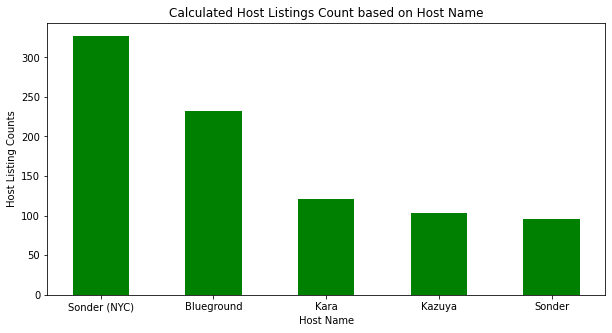

In [ ]:

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar(df1['host_name'], df1['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated Host Listings Count based on Host Name")
plt.xlabel("Host Name")
plt.ylabel("Host Listing Counts")


#### Here, Sonder (NYC), Blueground, Kara, and Kazuya has highest number of listings

In [ ]:
# Find the number of listing areawise (neighbourhood) using groupby operation
df2 = df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)
df2

,neighbourhood_group,calculated_host_listings_count
2,Manhattan,277073
1,Brooklyn,45925
3,Queens,23005
0,Bronx,2437
4,Staten Island,865


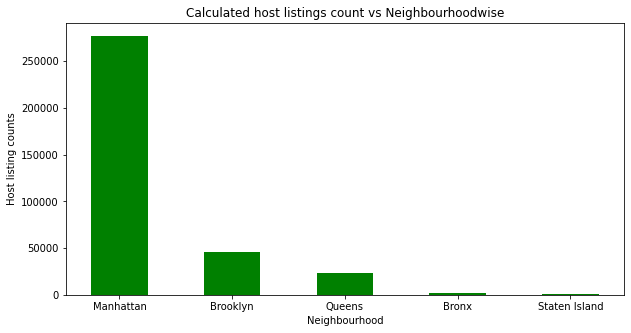

In [ ]:
fig = plt.figure(figsize = (10, 5))


plt.bar(df2['neighbourhood_group'], df2['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated host listings count vs Neighbourhoodwise")
plt.xlabel("Neighbourhood")
plt.ylabel("Host listing counts")

plt.show()

#### Here, the number of listings are highest in Manhattan  

### Which areas (and hosts) are the compartively busiest? 

In [ ]:
#sort the number of reviews relative to each neighbourhood to find the busiest area
busiest_areas =df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index().sort_values(by = 'number_of_reviews', ascending =False)
busiest_areas.set_index('neighbourhood_group')

,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


Text(0, 0.5, 'Number of Reviews')

<Figure size 720x360 with 0 Axes>

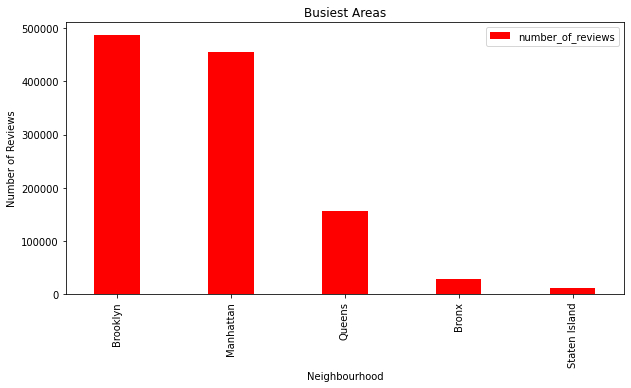

In [ ]:
fig = plt.figure(figsize = (10, 5))
busiest_areas.set_index('neighbourhood_group').plot(kind='bar', color='red', width=0.4)
plt.title("Busiest Areas")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")

#### Thus, Brooklyn is the busiest place.

In [ ]:
### sort the number of reviews relative to each neighbourhood
busiest_hosts=df.groupby(['host_name'])['number_of_reviews'].sum().reset_index().sort_values(by = 'number_of_reviews', ascending =False)
busiest_hosts.set_index('host_name').head(15)

,number_of_reviews
host_name,
Michael,11081
David,8103
John,7223
Jason,6522
Alex,6204
Chris,5028
Anna,4799
Eric,4733
Daniel,4723


Text(0, 0.5, 'Number of Reviews')

<Figure size 720x360 with 0 Axes>

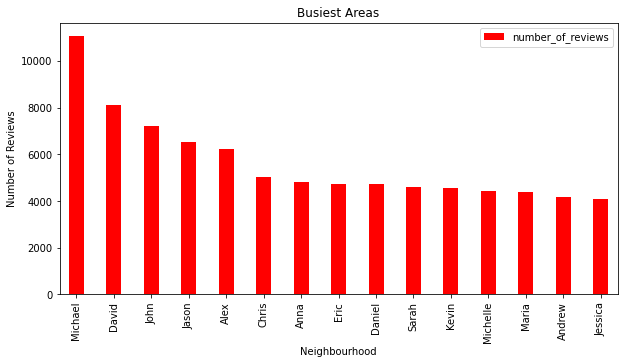

In [ ]:
fig = plt.figure(figsize = (10, 5))
busiest_hosts.set_index('host_name').head(15).plot(kind='bar', color='red', width=0.4)
plt.title("Busiest Areas")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Reviews")

#### Thus, Michael is the busiest host because he is getting lot of reviews.

In [ ]:
# find the availbility of rooms in the given neighbourhood
df.groupby(['neighbourhood_group','room_type'])['availability_365'].sum().reset_index().sort_values(by = 'availability_365', ascending =False)

,neighbourhood_group,room_type,availability_365
6,Manhattan,Entire home/apt,1546144
4,Brooklyn,Private room,1012369
3,Brooklyn,Entire home/apt,929184
7,Manhattan,Private room,812927
10,Queens,Private room,503179
9,Queens,Entire home/apt,277232
1,Bronx,Private room,111708
5,Brooklyn,Shared room,73517
8,Manhattan,Shared room,66515
0,Bronx,Entire home/apt,59882


##Which areas are most expensive relative to others?

In [ ]:
# Find expensive areas based on its price and room types
expensive_areas_list =df.groupby(['neighbourhood_group','room_type'])['price'].max().unstack()
expensive_areas_list

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,1000,2500,800
Brooklyn,10000,7500,725
Manhattan,10000,9999,1000
Queens,2600,10000,1800
Staten Island,5000,300,150


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

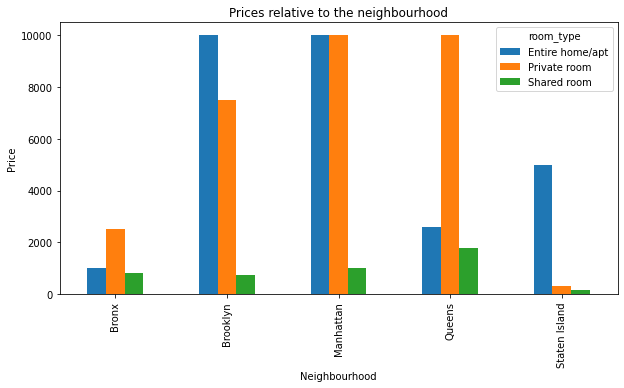

In [ ]:
# creating the bar plot to show the price in different neighbourhood considering the room type
plt.figure(figsize=(10,5))
expensive_areas_list.plot(kind='bar')
plt.title("Prices relative to the neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")


###Which hosts are charging more relative to others?

In [ ]:
most_expensive_hosts = df.groupby(['host_name','room_type'])['price'].max().reset_index().sort_values(by='price', ascending=False)
most_expensive_hosts_list= most_expensive_hosts.set_index('host_name').head(15)
most_expensive_hosts_list


,room_type,price
host_name,,
Erin,Entire home/apt,10000
Kathrine,Private room,10000
Jelena,Entire home/apt,10000
Olson,Entire home/apt,9999
Amy,Private room,9999
Matt,Entire home/apt,9999
Rum,Entire home/apt,8500
Jessica,Entire home/apt,8000
Sally,Entire home/apt,7703


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

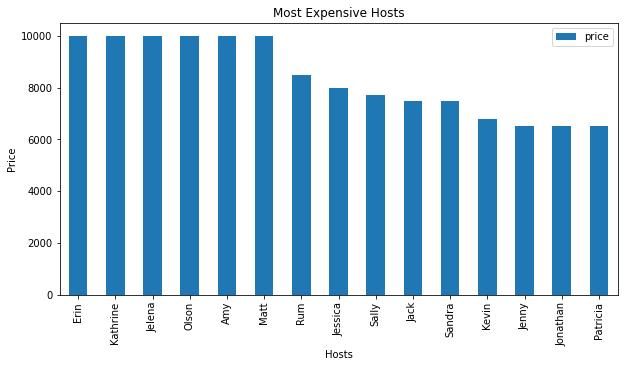

In [ ]:
#plot a bar graph to depict the host lists who are charging more
plt.figure(figsize=(10,5))
 

most_expensive_hosts_list.plot(kind='bar')
plt.title("Most Expensive Hosts")
plt.xlabel("Hosts")
plt.ylabel("Price")

####What rooms are booked (preferable) most compared to other types based on the number of ratings? (basis of avg review)

In [ ]:
preferable_room_type = df.groupby(['room_type'])['number_of_reviews'].sum().reset_index()

Text(0, 0.5, 'Average number of Reviews')

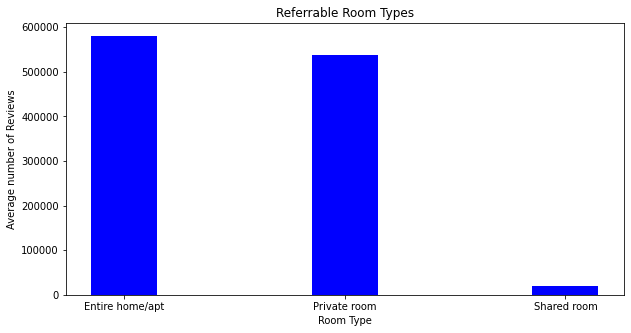

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(preferable_room_type['room_type'], preferable_room_type['number_of_reviews'], color='blue', width=0.3)

plt.title("Referrable Room Types")
plt.xlabel("Room Type")
plt.ylabel("Average number of Reviews")


### Find out the occupancies of rooms and its types based on its price.

In [ ]:
occupancies_of_rooms_based_on_price= df.groupby(['price','room_type'])['number_of_reviews'].sum().reset_index()
occupancies_of_rooms_based_on_price

,price,room_type,number_of_reviews
0,0,Entire home/apt,3
1,0,Private room,367
2,0,Shared room,7
3,10,Entire home/apt,187
4,10,Private room,52
...,...,...,...
1108,8500,Entire home/apt,2
1109,9999,Entire home/apt,1
1110,9999,Private room,6
1111,10000,Entire home/apt,5


Text(0.5, 1.0, 'Number of Reviews relative to its Cost(Price)')

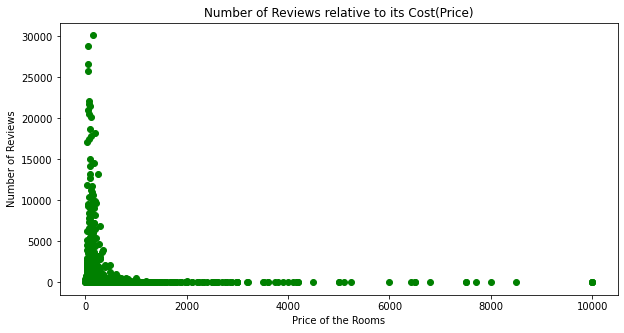

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(occupancies_of_rooms_based_on_price['price'], occupancies_of_rooms_based_on_price['number_of_reviews'], color= 'green')
 
plt.xlabel("Price of the Rooms")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews relative to its Cost(Price)")


Text(0.5, 1.0, 'Number of Reviews relative v/s Cost(Price)')

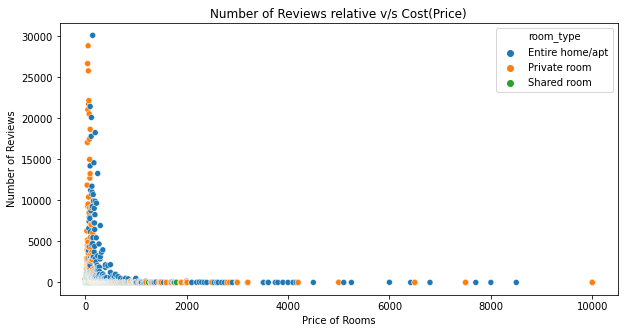

In [ ]:
# scatter plot between the number of reviews and price considering room types
sns.scatterplot(x='price', y='number_of_reviews', hue='room_type', data=occupancies_of_rooms_based_on_price)
plt.xlabel("Price of Rooms")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews relative v/s Cost(Price)")

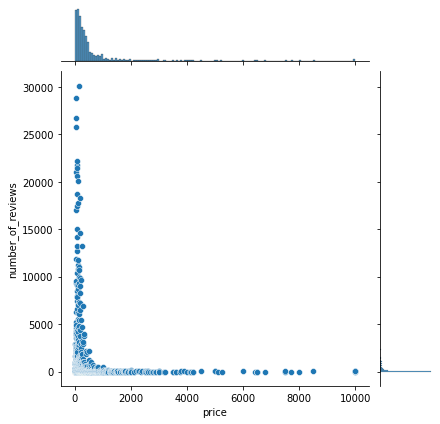

In [ ]:
# Use jointplot to show the scatter and bar plot
plt.rcParams['figure.figsize'] = (10,5)

sns.jointplot(x='price', y='number_of_reviews', data=occupancies_of_rooms_based_on_price)

### So, least expensive rooms are booked more, and enitre home/apt is booked more.

### Show the correlation between the 'price','number_of_reviews','minimum_nights', and 'availability_365'

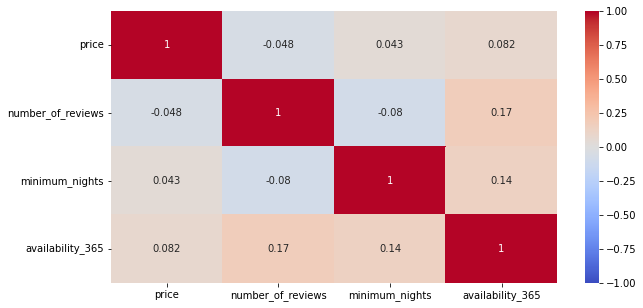

In [ ]:
# Use heatmap
corr_df = df[['price','number_of_reviews','minimum_nights','availability_365']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)


# Where people are staying more?

In [ ]:
preferable_room_types = df.groupby(['price','room_type'])['minimum_nights'].sum().reset_index().sort_values(by='minimum_nights', ascending=False)
preferable_room_types

,price,room_type,minimum_nights
355,150,Entire home/apt,11663
104,50,Private room,9275
460,200,Entire home/apt,8820
239,100,Entire home/apt,7784
547,250,Entire home/apt,7068
...,...,...,...
764,415,Private room,1
138,61,Shared room,1
1029,1497,Entire home/apt,1
1028,1495,Entire home/apt,1


Text(0.5, 1.0, 'Price v/s Minimum Nights')

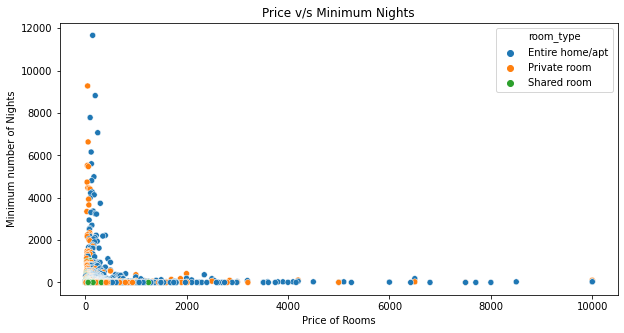

In [ ]:
sns.scatterplot(x='price', y='minimum_nights', hue='room_type', data=preferable_room_types)
plt.xlabel("Price of Rooms")
plt.ylabel("Minimum number of Nights")
plt.title("Price v/s Minimum Nights")